In [123]:
#imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime

In [124]:
#load data
prices1999 = pd.read_csv('data-csv/ResaleFlatPricesBasedonApprovalDate19901999.csv')
prices2012 = pd.read_csv('data-csv/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
prices2014 = pd.read_csv('data-csv/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
prices2017 = pd.read_csv('data-csv/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [125]:
#need to combine all the data
df1999 = prices1999
df2012 = prices2012
df2014 = prices2014
df2017 = prices2017

#drop remaining lease column (because only >2017 has this column will recalculate later)
df2017.drop('remaining_lease', axis='columns', inplace=True)
df = pd.concat([df1999,df2012,df2014,df2017],ignore_index=True)

In [126]:
#not using block number to train model
#also not using street name will just generalise just under town
df.drop('block', axis='columns', inplace=True)
df.drop('street_name', axis='columns', inplace=True)

In [127]:
current_year = datetime.now().year
df['remaining_lease (years)'] = 99 - (current_year - df.lease_commence_date) 
df.drop('lease_commence_date',axis='columns',inplace=True)

In [128]:
df['flat_model'] = df['flat_model'].str.upper()
df

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease (years)
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,9000.0,52
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,6000.0,52
2,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,8000.0,52
3,1990-01,ANG MO KIO,1 ROOM,07 TO 09,31.0,IMPROVED,6000.0,52
4,1990-01,ANG MO KIO,3 ROOM,04 TO 06,73.0,NEW GENERATION,47200.0,51
...,...,...,...,...,...,...,...,...
885418,2024-04,YISHUN,5 ROOM,07 TO 09,112.0,IMPROVED,660000.0,90
885419,2024-04,YISHUN,5 ROOM,01 TO 03,112.0,IMPROVED,585000.0,75
885420,2024-04,YISHUN,5 ROOM,13 TO 15,112.0,IMPROVED,673800.0,90
885421,2024-04,YISHUN,5 ROOM,07 TO 09,112.0,IMPROVED,725000.0,93


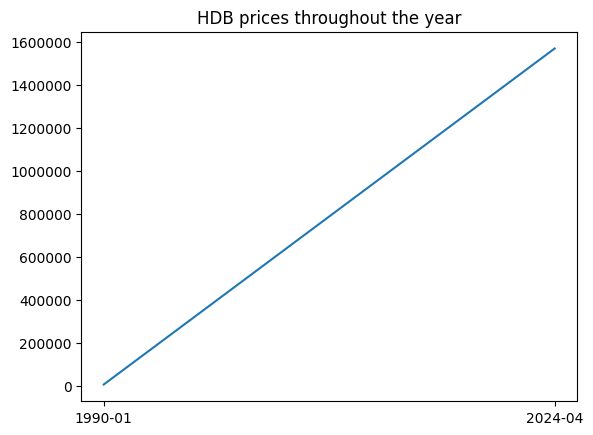

In [129]:
min_resale = df['resale_price'].min()
max_resale = df['resale_price'].max()
earliest_month = df['month'].min()
latest_month = df['month'].max()

x_coor = np.array([earliest_month, latest_month])
y_coor = np.array([min_resale, max_resale])

plt.plot(x_coor, y_coor)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('HDB prices throughout the year')
plt.show()